### Contents
* [Decision Region Generation](#decision-region-generation)
* [Decision Region Analysis](#decision-region-analysis)
  * [Aggregation Modes](#aggregation-modes)
  * [Types of Plots](#types-of-plots)
* [Complete Implementation](#complete-implementation)

**Note:** all output files are saved in the RST_Decision_Region_Analysis/examples folder (the folder this notebook is in), and all plots are displayed in this notebook file.

### Decision Region Generation
Generates triplets of samples, creates vicinal distributions, and evaluates the virtual images using the provided model. Saves output to an hdf5 file.

In [11]:
# Generate only
%run ../test/run_generation.py \
    --save_loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --model_file "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/example_model.onnx" \
    --data_csv "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/example_input.csv" \
    --img_rel_path "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/" \
    --n_triplets 5 \
    --steps 20 \
    --shape "triangle"\
    --overwrite

Loading model...Complete
Created 4 groups:
	group 0: {'COVID_positive': 'No', 'sex': 'F'}
	group 1: {'COVID_positive': 'No', 'sex': 'M'}
	group 2: {'COVID_positive': 'Yes', 'sex': 'F'}
	group 3: {'COVID_positive': 'Yes', 'sex': 'M'}
Generating 20 triplets (5/group)
[############################################################] 20/20
Decision region generation complete; output file: ../examples/decision_regions.hdf5


### Decision Region Analysis
Determines the composition (portion of virtual images assigned to each class) ands saves to an output csv. If an argument is passed for plot, generates summary plots as specified.
#### Aggregation Modes
 - `group`: Aggregates composition separately for each group (e.g., Female-Positive)
 - `class`: Aggregates composition separately for each class (e.g., Positive)
 - `all`: Aggregates composition of all triplets across all groups/classes; cannot be used with --plot=performance

In [12]:
# Analysis only

%run ../test/run_analysis.py \
    --save-loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --overwrite \
    --aggregate class 

Saving decision region compositions to file: ../examples/decision_region_compositions_class.csv


#### Types of Plots
- `composition`: The percentage of virtual images classified as belonging to each class; grouped according to --aggregate.
- `performace`: The percentage of virtual images classified as belonging to the same class as their triplet; cannot be used with --aggregate=all
- `region`: Plots the individual decision regions of triplets.

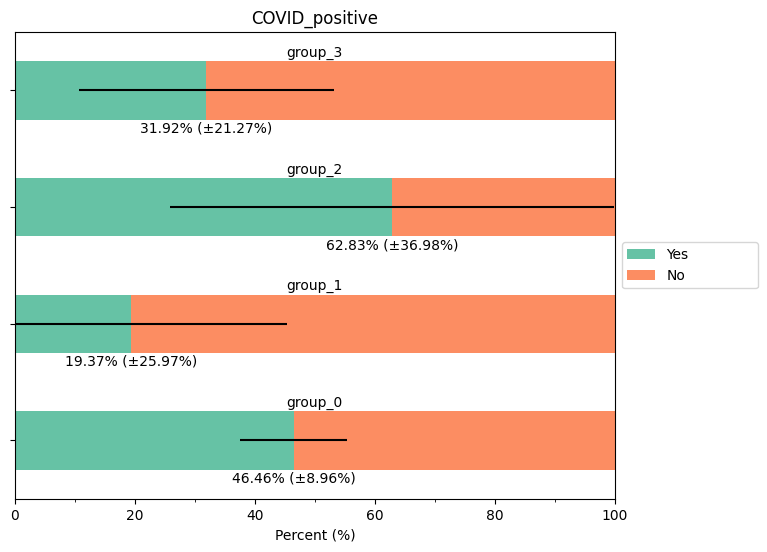

In [13]:
# Plot: Composition
%run ../test/run_analysis.py \
    --save-loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --aggregate group \
    --plot composition \
    --plot-only --show --display-only

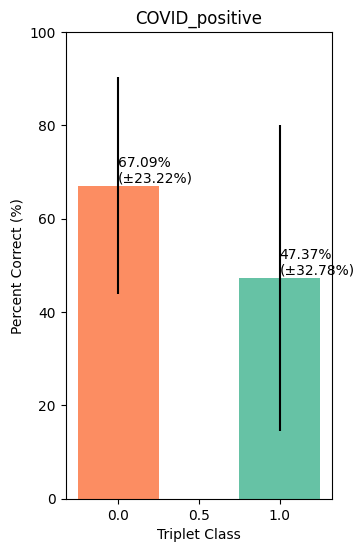

In [14]:
# Plot: Performance
%run ../test/run_analysis.py \
    --save-loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --aggregate class \
    --plot performance \
    --plot-only --show --display-only

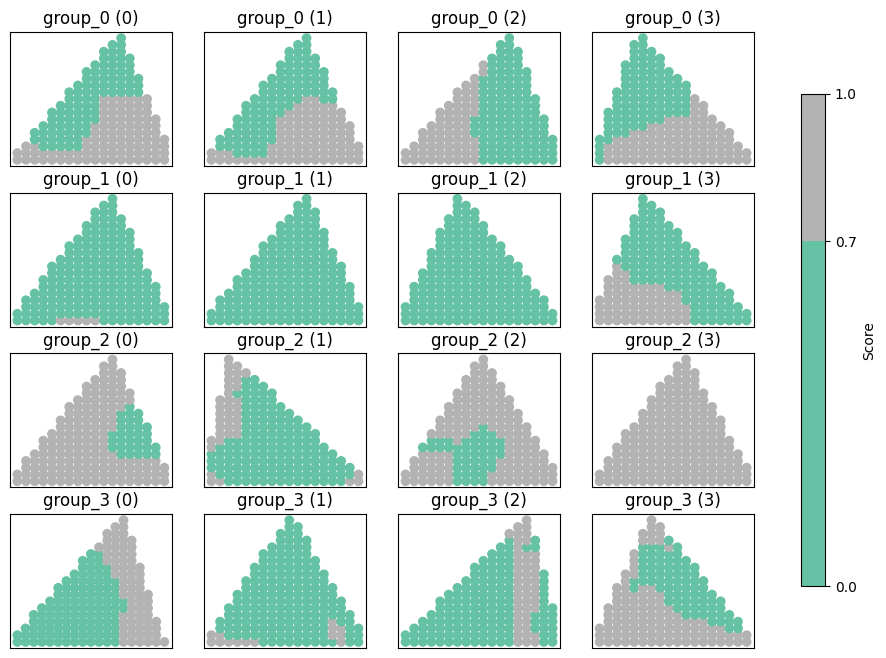

In [15]:
# Plot: region
%run ../test/run_analysis.py \
    --save-loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --aggregate group \
    --plot region \
    --plot-threshold 0.7 \
    --n-per-group 4 \
    --plot-only --show --display-only

### Complete Implementation
Combines the two steps above to generate and analyze decision regions in a single script.

Loading model...Complete
Created 4 groups:
	group 0: {'COVID_positive': 'No', 'sex': 'F'}
	group 1: {'COVID_positive': 'No', 'sex': 'M'}
	group 2: {'COVID_positive': 'Yes', 'sex': 'F'}
	group 3: {'COVID_positive': 'Yes', 'sex': 'M'}
Generating 20 triplets (5/group)
[############################################################] 20/20
Decision region generation complete; output file: ../examples/decision_regions.hdf5
Saving decision region compositions to file: ../examples/decision_region_compositions_group.csv
Plot saved at ../examples/decision_region_composition_group.png


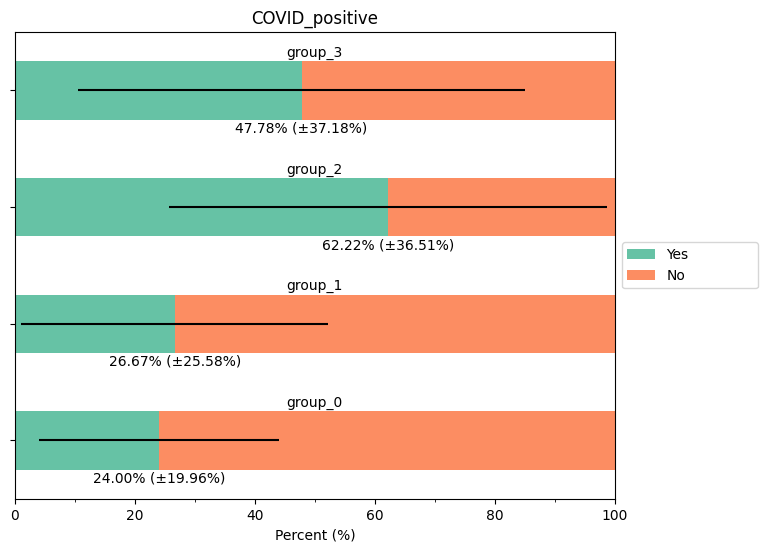

In [16]:
# Complete implementation
%run ../test/main.py \
    --save_loc "../examples" \
    --classes "COVID_positive:No,Yes" \
    --subgroup_attributes "sex:F,M" \
    --model_file "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/example_model.onnx" \
    --data_csv "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/example_input.csv" \
    --img_rel_path "/gpfs_projects/alexis.burgon/RST_decision_region_analysis_example_files/" \
    --aggregate group \
    --plot composition \
    --show \
    --overwrite